In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


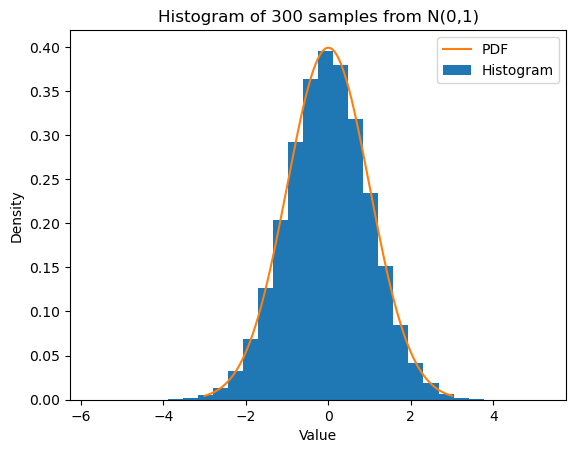

In [15]:
# 5.1a
samples = np.random.normal(loc=0, scale=1, size=3000000)
plt.hist(samples, bins=30, density=True)
plt.title("Histogram of 300 samples from N(0,1)")
plt.xlabel("Value") # x-axis label
plt.ylabel("Density") # y-axis label
x_axis = np.arange(-3, 3, 0.001)
plt.plot(x_axis, norm.pdf(x_axis,0,1))
plt.legend(["PDF", "Histogram"])
plt.show()

In [16]:
# 5.1b
mean = np.mean(samples)
std_dev = np.std(samples)
print(f"Mean: {mean}, Standard Deviation: {std_dev}")

Mean: -0.0009481865107164905, Standard Deviation: 0.9998386161494659


As the number of samples increases the mean gets closer to the true value and so does the standard deviation also approaches the true value.

In [37]:
#5.2a
def su(x):
    return np.sqrt(2)/np.sqrt(np.pi*(1+(x-1)**2))*np.exp(-.5*(3+2*np.arcsinh(x-1))**2)

importance_samples = np.random.normal(loc = 0, scale= 1, size=1000)
weights = su(importance_samples) / norm.pdf(importance_samples, loc=0, scale=1)
print(f"Estimated mean: {np.mean(weights*importance_samples)}")

Estimated mean: -0.8062748720860047


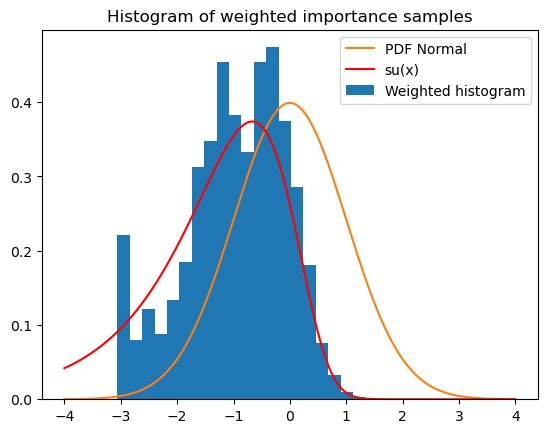

In [38]:
# 5.2b
plt.hist(importance_samples, bins=30, weights=weights, density=True)
plt.title("Histogram of weighted importance samples")
x_axis = np.arange(-4, 4, 0.001)
plt.plot(x_axis, norm.pdf(x_axis,0,1))
plt.plot(x_axis, su(x_axis), color='red')
plt.legend(["PDF Normal", "su(x)", "Weighted histogram"])
plt.show()

With only 1000 samples the quality of the histogram is not that good compared to the pdf it is trying to create. There is only a vague shape of the Johnson's $S_U$ distribution. 

#### 5.2c  
When using more samples the Monte Carlo estimation improves

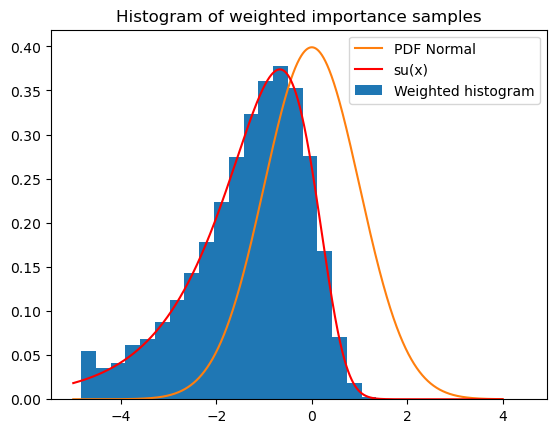

In [42]:
importance_samples = np.random.normal(loc = 0, scale= 1, size=1000000)
weights = su(importance_samples) / norm.pdf(importance_samples, loc=0, scale=1)
plt.hist(importance_samples, bins=30, weights=weights, density=True)
plt.title("Histogram of weighted importance samples")
x_axis = np.arange(-5, 4, 0.001)
plt.plot(x_axis, norm.pdf(x_axis,0,1))
plt.plot(x_axis, su(x_axis), color='red')
plt.legend(["PDF Normal", "su(x)", "Weighted histogram"])
plt.show()

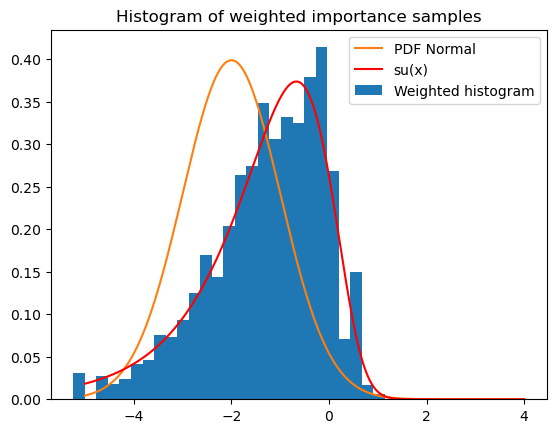

Estimated mean: -1.2478489455305513
Estimated variance: 1.3544026325191847


In [99]:
# 5.2d
np.random.seed(42)  # For reproducibility
n= 1000
importance_samples = np.random.normal(loc = -2, scale= 1, size=n)
su_samples = su(importance_samples)
weights = su_samples/ norm.pdf(importance_samples, loc=-2, scale=1)
plt.hist(importance_samples, bins=30, weights=weights, density=True)
plt.title("Histogram of weighted importance samples")
x_axis = np.arange(-5, 4, 0.001)
plt.plot(x_axis, norm.pdf(x_axis,-2,1))
plt.plot(x_axis, su(x_axis), color='red')
plt.legend(["PDF Normal", "su(x)", "Weighted histogram"])
plt.show()

# 5.2e
mean = np.mean(weights*importance_samples)
print(f"Estimated mean: {mean}")
print(f"Estimated variance: {np.mean(((importance_samples - mean))**2*weights)}")

#### 5.2d  
Adjusting the proposal distribution improves the estimation 
#### 5.2e 
As n increases we get closer to the mean and standard deviation but don't fully approximate it but you need a lot of samples to get close to the actual analyitical solution

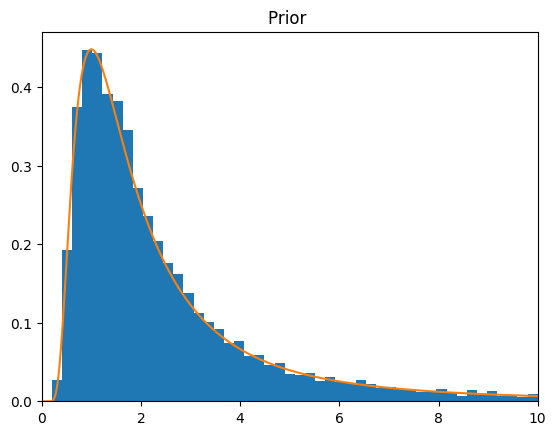

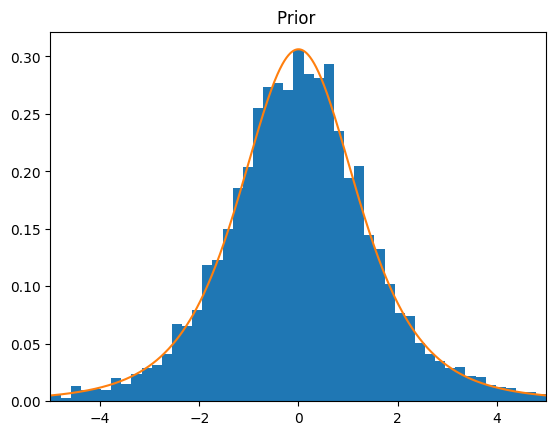

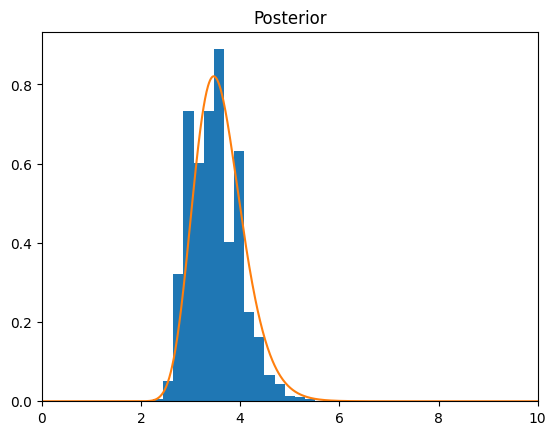

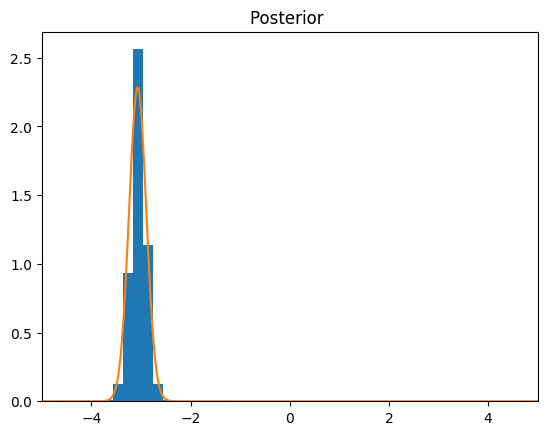

In [1]:
import numpy as np
import matplotlib . pyplot as plt
from scipy . stats import invgamma , t

m = 0
l = 1
b = 3
a = 2

N = 100
w0 = -3
X = np. random . normal (size=N)
y = X*w0 + np. random . normal (size=N)*2

# Analytical solution
s2v = np. linspace (0 ,10 ,1000)
wv = np. linspace ( -5 ,5 ,1000)
mpost = (m*l+np.sum(X*y))/(l+np.sum(X**2))
lpost = l + np.sum(X**2)
apost = a + N/2
bpost = b +.5*( np.sum(y**2)+m**2*l -(m*l+np.sum(X*y)) **2/( l+np.sum(X**2)))

# Importance sampling
L = 10000

s2is = invgamma .rvs(size=L,a=a, scale =b)
plt.hist(s2is , density =True ,bins=np. linspace (0 ,10 ,50))
plt.plot(s2v , invgamma .pdf(x=s2v ,a=a, scale =b))
plt.xlim ((0 ,10))
plt. title ("Prior ")
plt.show ()

wis = np. random . normal (size=L)*np.sqrt(s2is/l)+m
plt.hist(wis , density =True ,bins=np. linspace ( -5 ,5 ,50))
plt.plot(wv ,t.pdf(x=wv ,df =2*a,loc=m, scale =np.sqrt(b/(a*l))))
plt.xlim (( -5 ,5))
plt. title ("Prior ")
plt.show ()

weightis = 1/ np.sqrt (2* np.pi*s2is)**N*np.exp ( -1/(2* s2is)*np.sum ((X[:,np. newaxis ]* wis[np.newaxis ,:] -y
[:,np. newaxis ]) **2 , axis =0))

plt.hist(s2is , density =True ,bins=np. linspace (0 ,10 ,50) ,weights = weightis )
plt.plot(s2v , invgamma .pdf(x=s2v ,a=apost , scale = bpost ))
plt.xlim ((0 ,10))
plt. title ("Posterior")
plt.show ()

plt.hist(wis , density =True ,bins=np. linspace ( -5 ,5 ,50) ,weights = weightis )
plt.plot(wv ,t.pdf(x=wv ,df =2* apost ,loc=mpost , scale =np.sqrt( bpost /( lpost * apost ))))
plt.xlim (( -5 ,5))
plt. title ("Posterior ")
plt.show ()
